In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv(url, names=column_names)

# **Head/Table Overview**

The dataset has 303 rows and 14 columns. All features relate to demographic or clinical measurements from real patient records. Features include age, sex, cholesterol, blood pressure, chest pain type, and more.

In [ ]:
df.head()             # Show first few rows
df.shape              # (rows, columns)
df.info()             # Data type info
df.describe()         # Numeric summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


# **Info/Describe**

All columns are either numeric or categorical, with some missing values mainly in ca and thal. Key statistics (mean, median) of age and numeric variables fall within expected clinical ranges, with some evidence of outliers in variables like cholesterol.


In [ ]:
df = df.replace('?', np.nan)
df['ca'] = df['ca'].astype(float)
df['thal'] = df['thal'].astype(float)
df.isnull().sum()  # Check for missing values

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


# **Missing Values**

Only a few records have missing data, mainly in the ca and thal fields. For EDA, I dropped missing rows, but for modeling, imputation should be considered.



In [ ]:
df = df.dropna()  # To keep things simple for basic EDA

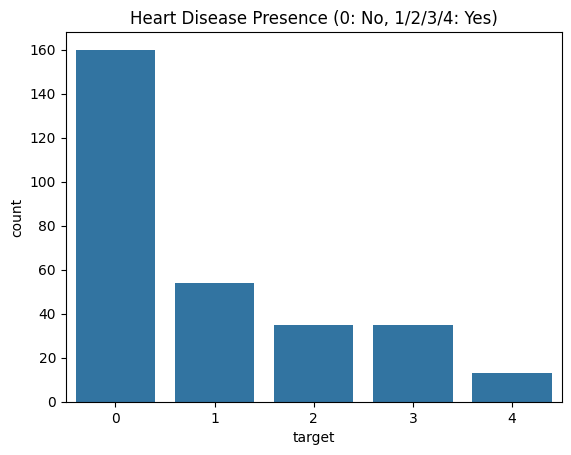

target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64


In [ ]:
sns.countplot(x='target', data=df)
plt.title('Heart Disease Presence (0: No, 1/2/3/4: Yes)')
plt.show()
print(df['target'].value_counts())

# **Histograms of Numeric Variables**

Age: Most patients are between 40 and 60 years old. There are few patients in very old age groups.

Resting Blood Pressure (trestbps): The majority of values are around 120–140mmHg; some high outliers may indicate hypertension.

Cholesterol (chol): Distribution is right-skewed, with most values between 200–300mg/dl, and a few patients with very high cholesterol levels.

Maximum Heart Rate (thalach): The majority achieve 120–170bpm, generally lower in older age groups.

Oldpeak: Most patients have low ST depression values, but a long tail shows a minority with significant issues.

In [ ]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

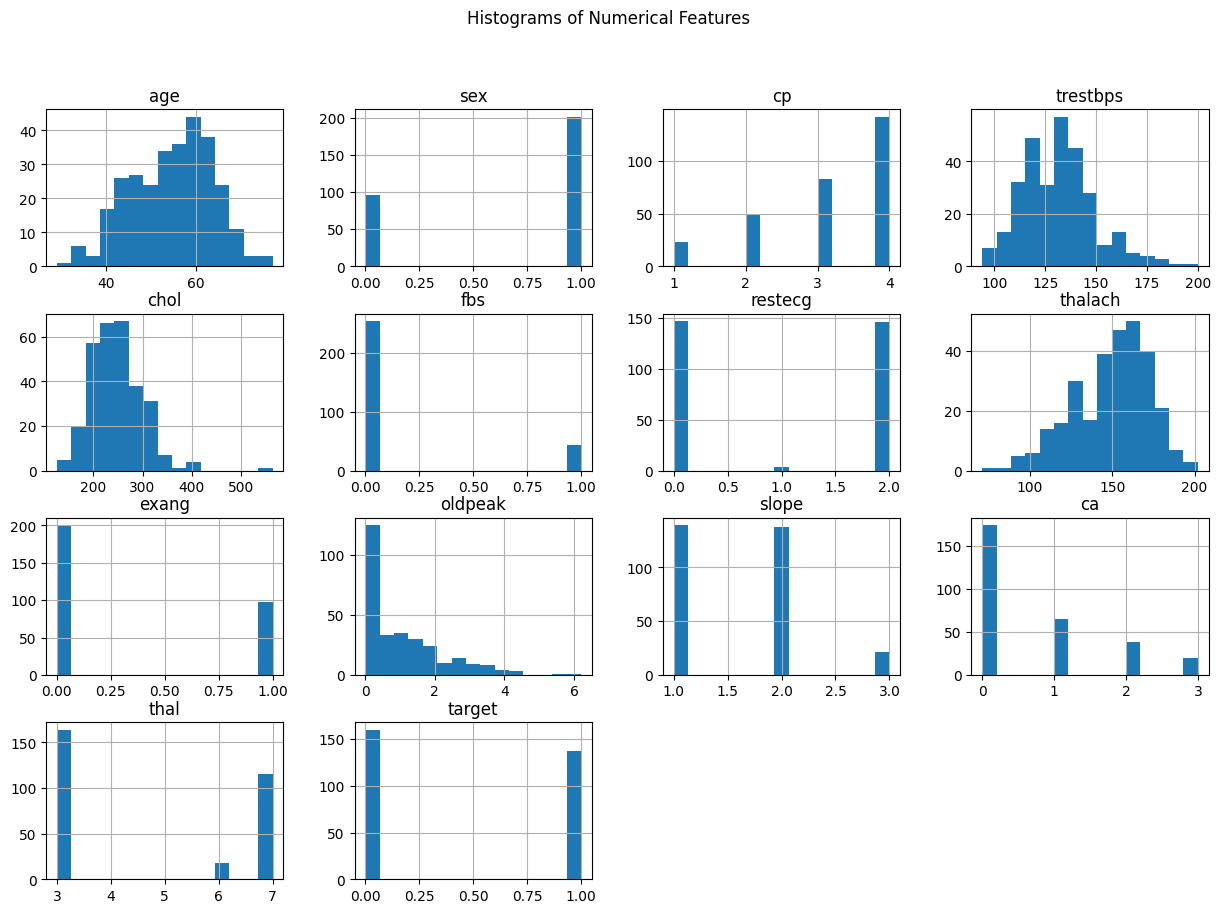

In [ ]:
df.hist(bins=15, figsize=(15,10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# **Bar Plots/Countplots of Categorical Variables**

Sex: More males than females in the dataset.

Chest Pain Type (cp): "Type 4" (asymptomatic) is most common, indicating many patients have minimal chest pain, perhaps due to sample bias towards known/suspected cases.

Fasting Blood Sugar (fbs): Most patients have normal fasting blood sugar (0).

Resting ECG (restecg): Most test as normal, fewer show abnormalities.

Exercise-Induced Angina (exang): Majority do not experience angina during exercise.

Slope, ca, thal: Most typical/normal values are the most common, but there’s good representation of abnormal values as well.


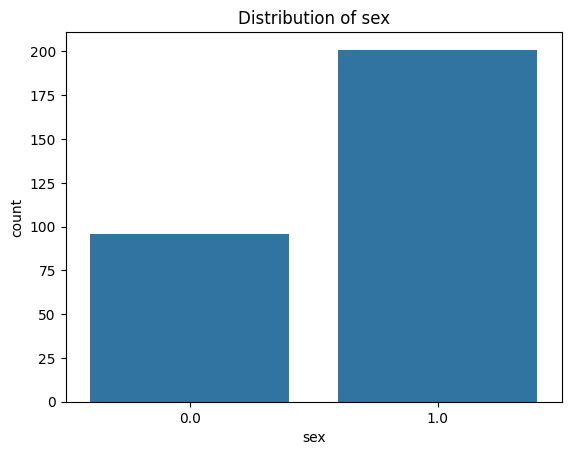

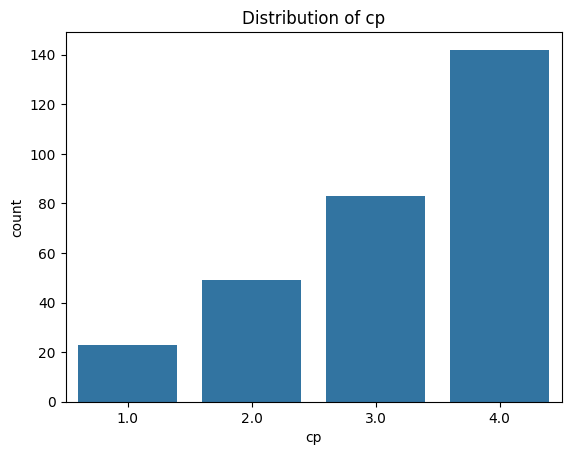

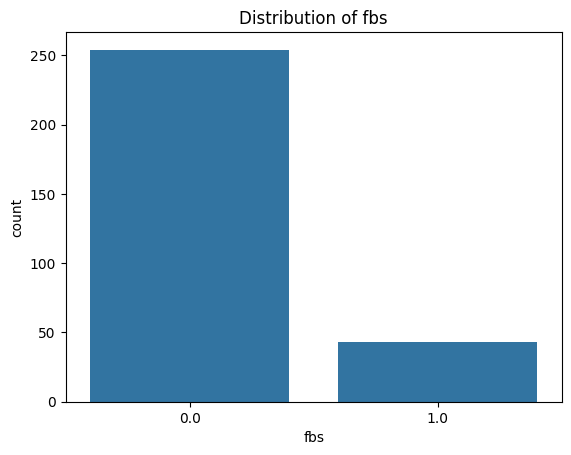

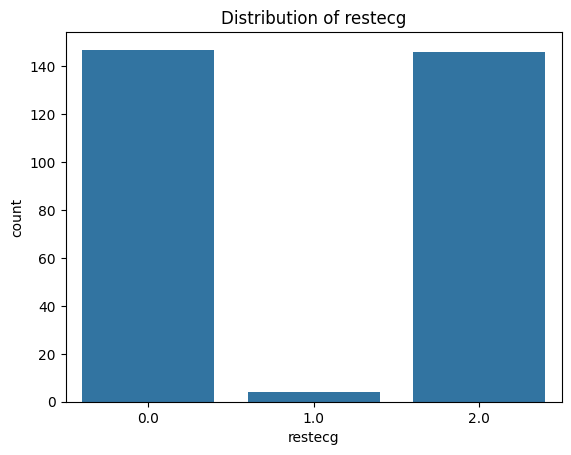

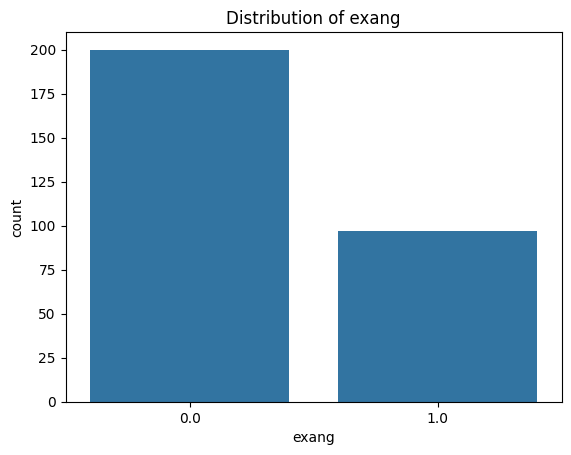

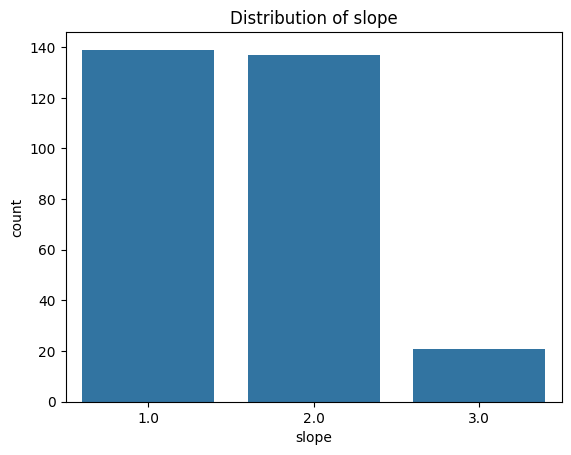

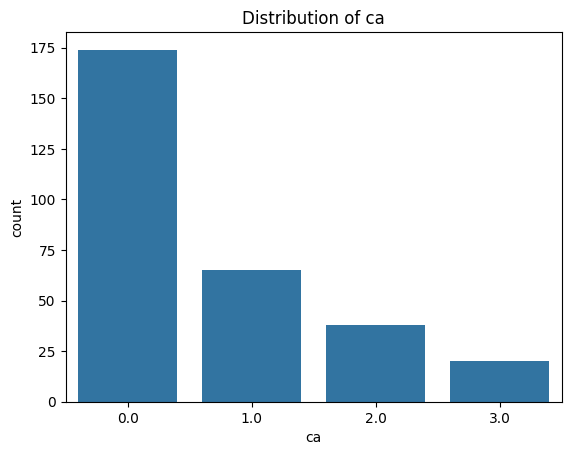

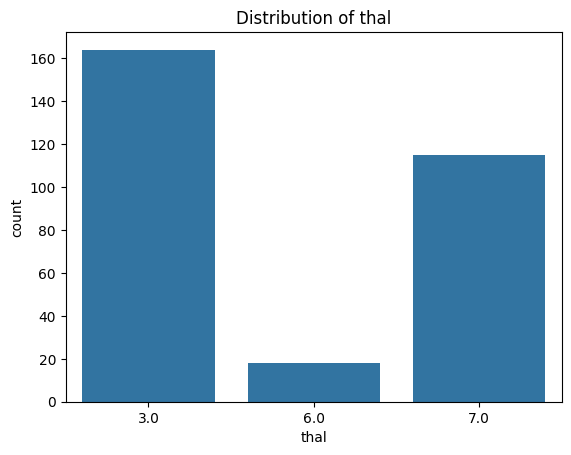

In [ ]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

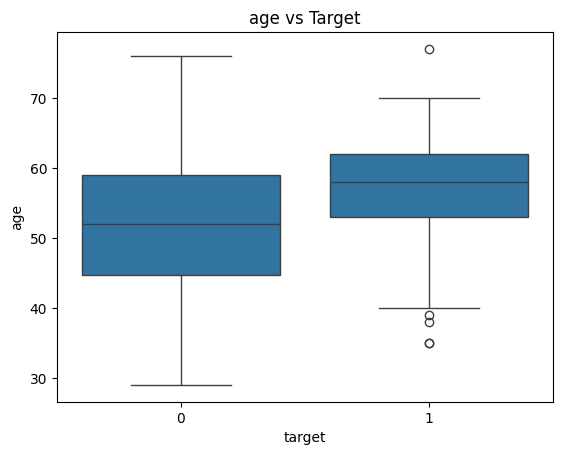

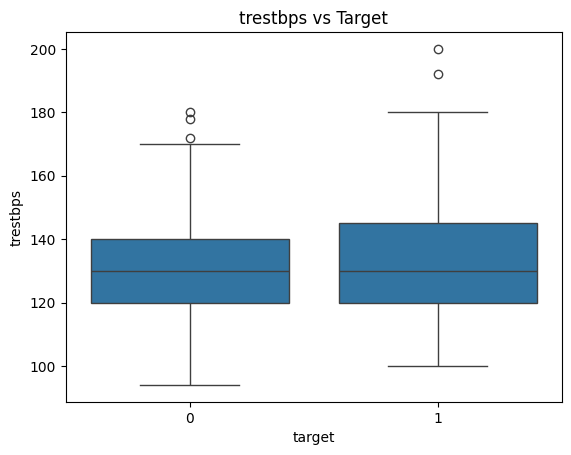

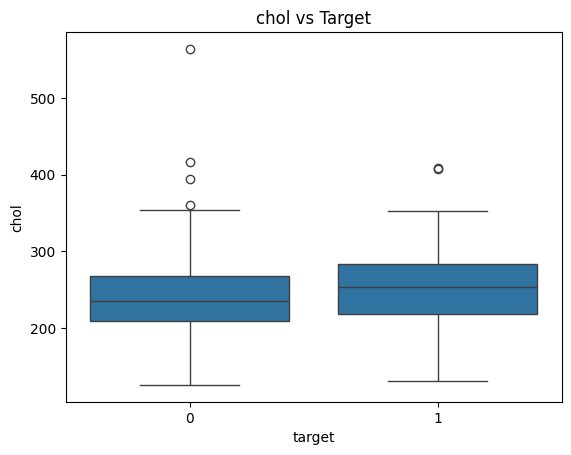

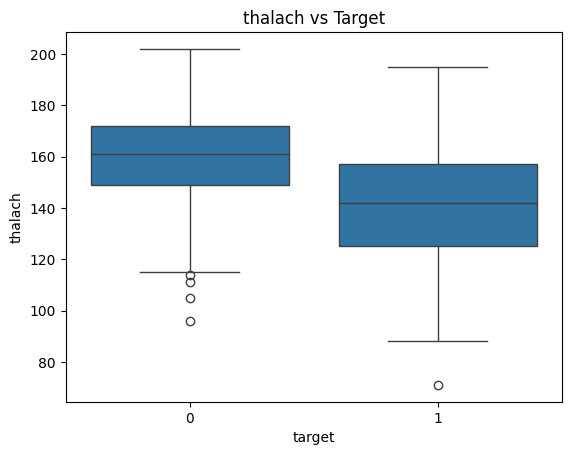

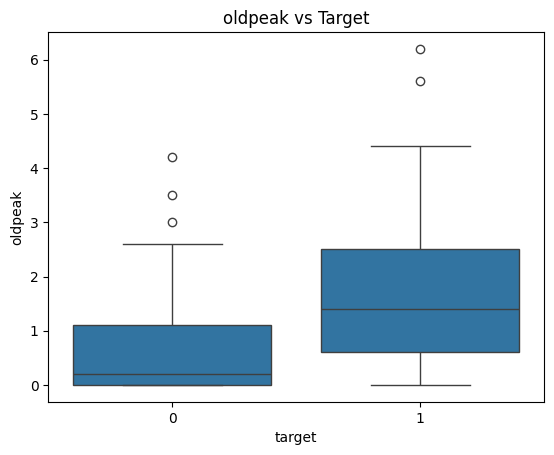

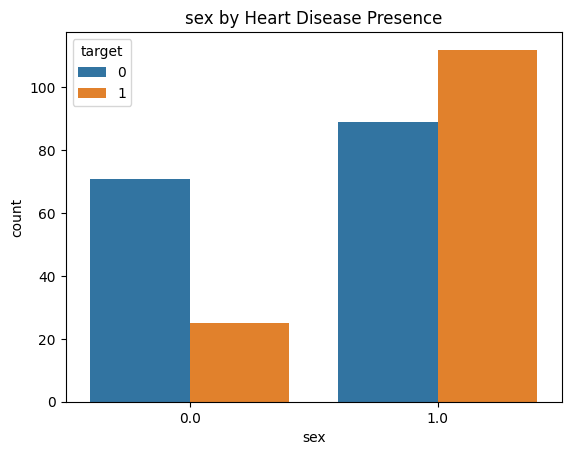

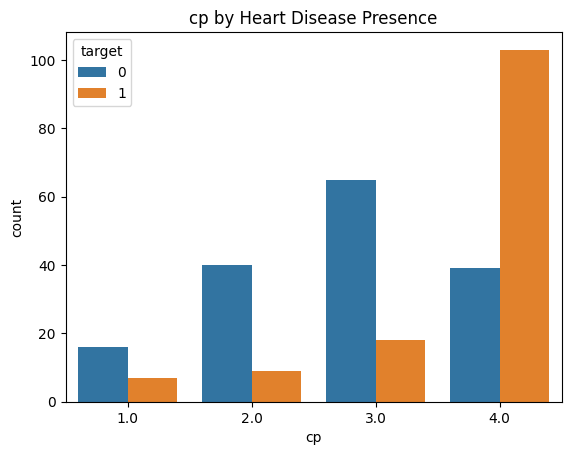

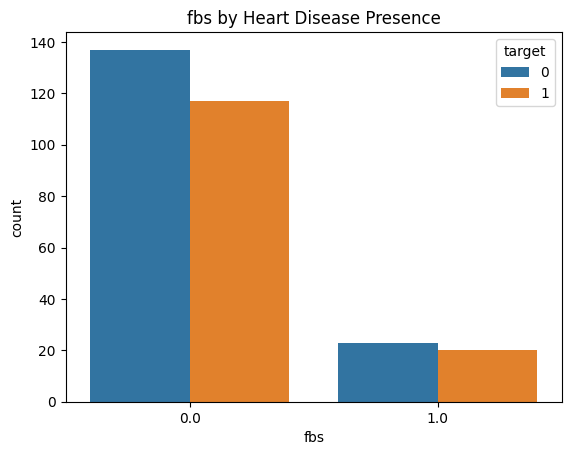

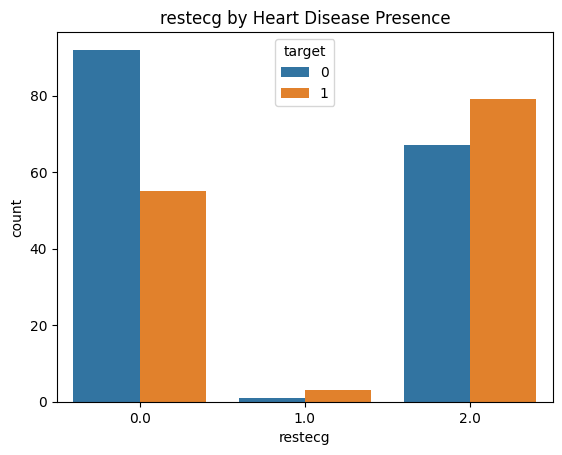

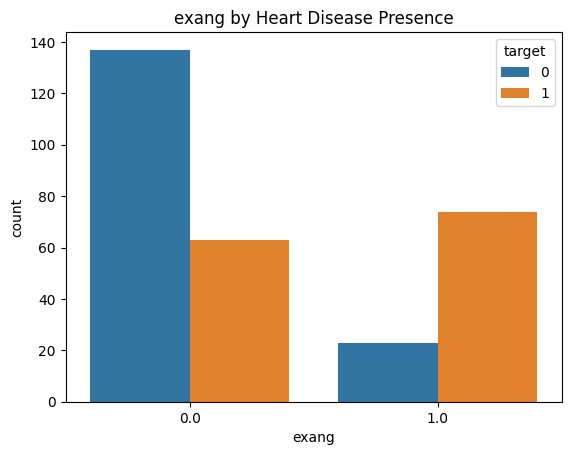

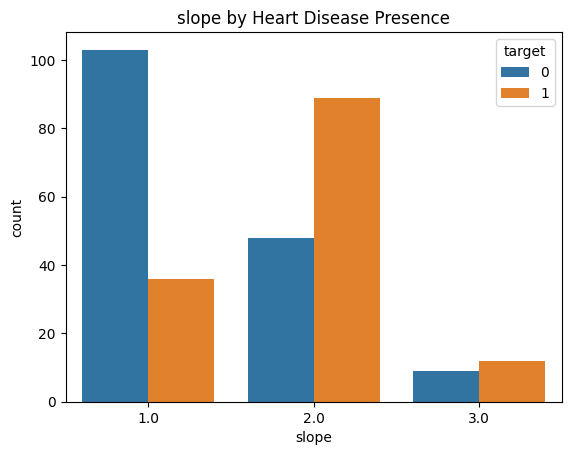

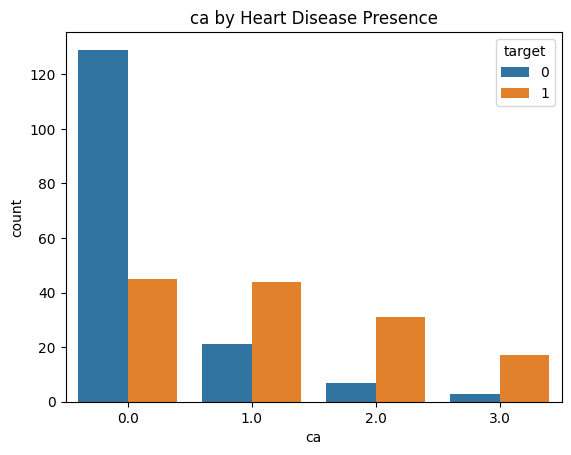

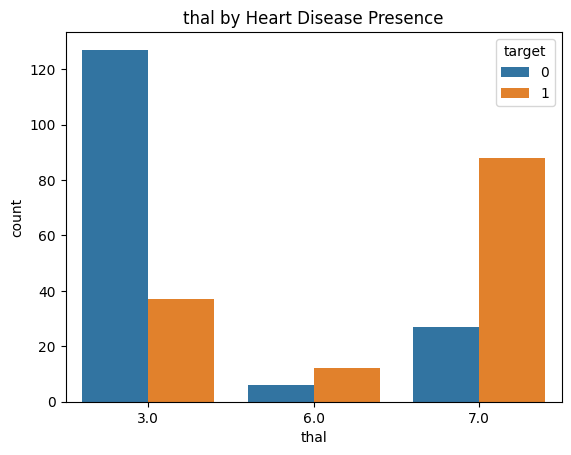

In [13]:
# Numerical features by target
for col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target')
    plt.show()

# Categorical features by target
for col in cat_cols:
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f'{col} by Heart Disease Presence')
    plt.show()


# **Countplots of Categorical by Target**

Sex: Heart disease is more common in males than females.

Chest Pain Type: Non-typical angina and asymptomatic chest pain types are more likely among patients with heart disease.

Exercise-Induced Angina: Those with exercise-induced angina are more likely to have heart disease.

Restecg, slope, fbs, thal, ca: Rates of abnormalities are higher in the heart disease group, showing their diagnostic importance.


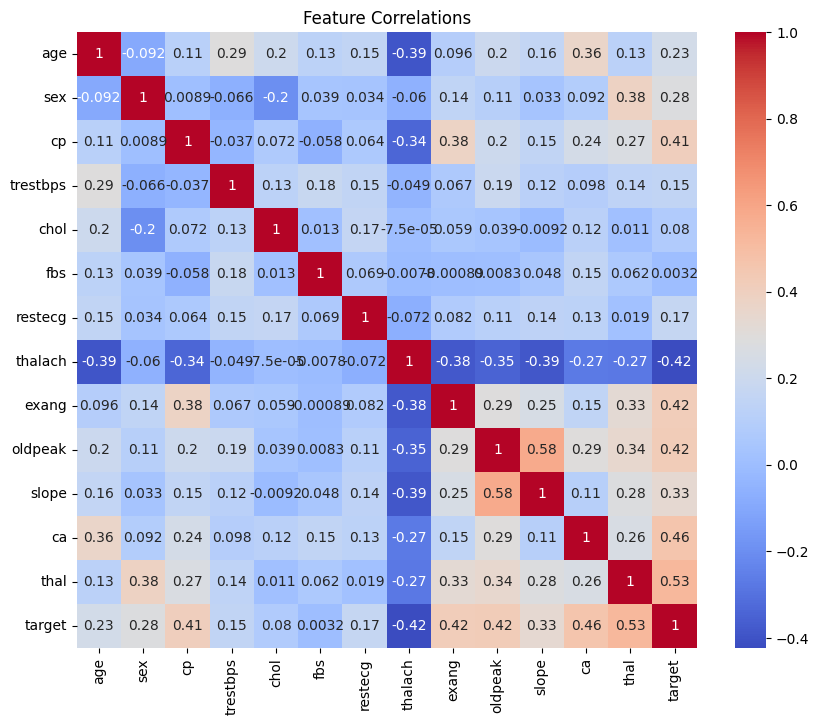

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()


# **Correlation Heatmap**

thalach (maximum heart rate) and oldpeak show moderate correlations with the target. Some features, such as cp (chest pain type), have a fairly strong negative association (as chest pain type increases, likelihood of disease increases). Potential multicollinearity should be checked, but most features have low inter-correlations.



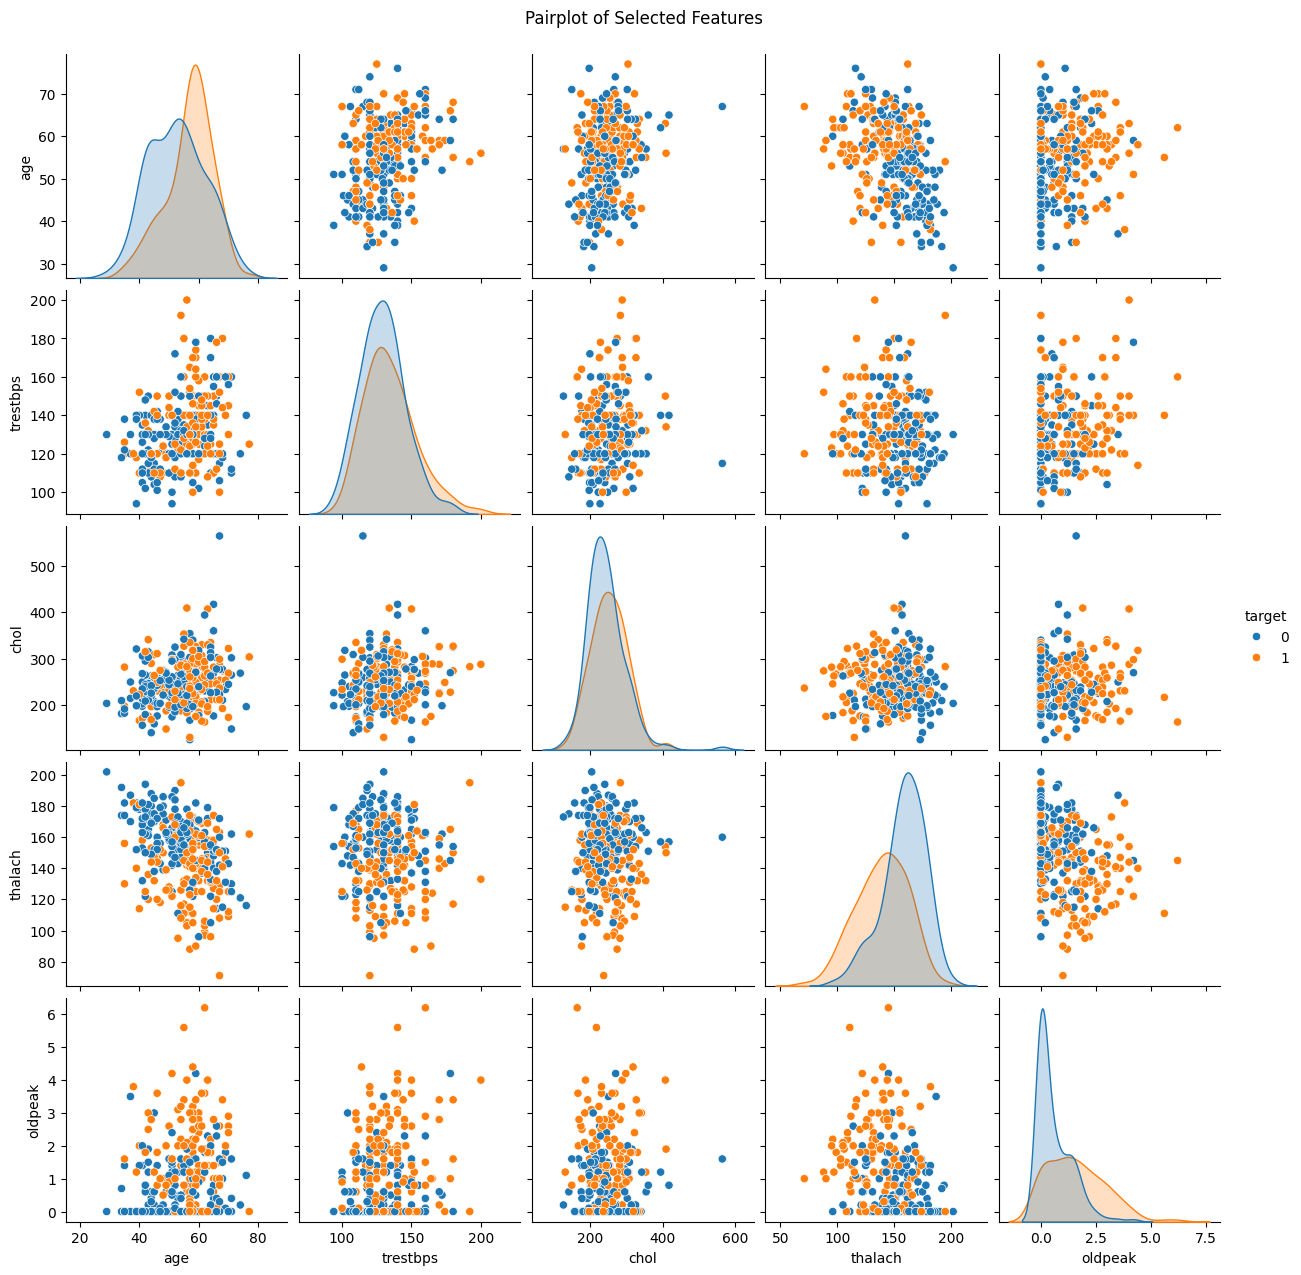

In [15]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# **Pairplot**

Patients with heart disease often cluster differently from those without when considering combinations such as age, cholesterol, and thalach. Some feature pairs show partially distinct groupings by target.

